<a href="https://colab.research.google.com/github/nayanapreethi/DSA---Session-/blob/main/Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install pandas scikit-learn matplotlib seaborn


Dataset Shape: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


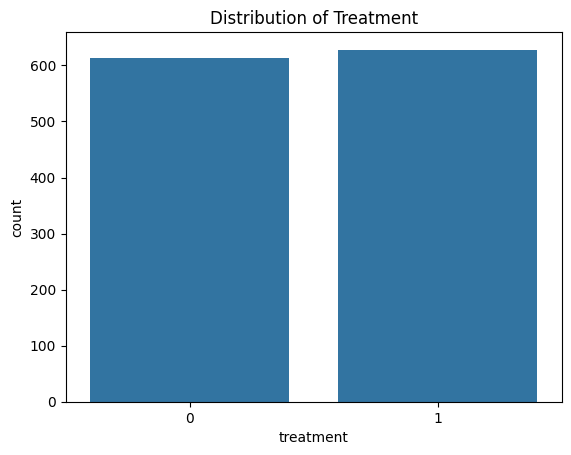

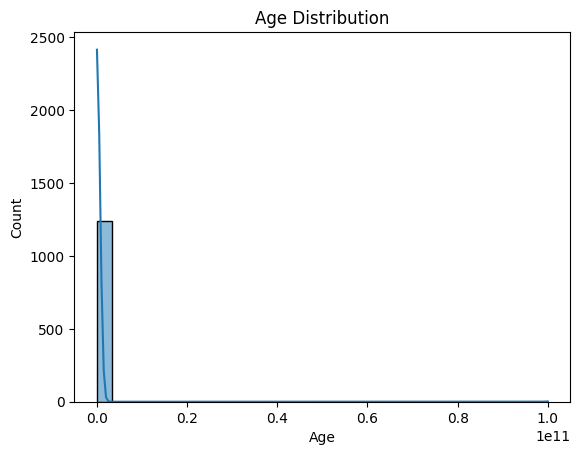

✅ Accuracy: 0.6224899598393574

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.63       127
           1       0.62      0.61      0.61       122

    accuracy                           0.62       249
   macro avg       0.62      0.62      0.62       249
weighted avg       0.62      0.62      0.62       249



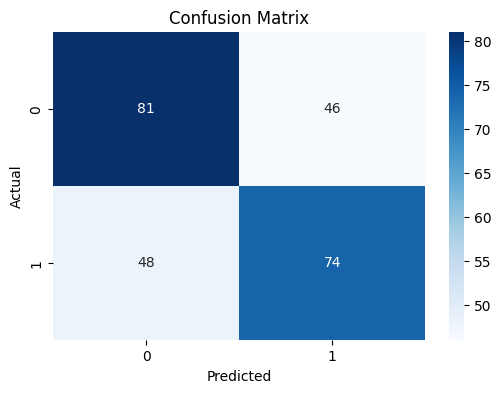

Model and features saved.

🧠 Let's check your mental health risk:
1. What is your age? (e.g., 25): 50
2. What is your gender? (Male/Female/Other): Male
3. Are you self-employed? (Yes/No): Yes
4. Do you have a family history of mental illness? (Yes/No): No

🟢 Your responses do not currently indicate a mental health risk requiring treatment.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


df = pd.read_csv("/content/drive/MyDrive/survey.csv")

print("Dataset Shape:", df.shape)
display(df.head())

df = df.dropna(subset=['treatment'])
df['treatment'] = LabelEncoder().fit_transform(df['treatment'])  # Yes=1, No=0


df = df[['Age', 'Gender', 'self_employed', 'family_history', 'treatment']].dropna()


df = pd.get_dummies(df, columns=['Gender', 'self_employed', 'family_history'], drop_first=True)


sns.countplot(data=df, x='treatment')
plt.title("Distribution of Treatment")
plt.show()

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


joblib.dump(model, 'mental_health_model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')
print("Model and features saved.")


print("\n🧠 Let's check your mental health risk:")

model = joblib.load('mental_health_model.pkl')
model_features = joblib.load('model_features.pkl')

age = int(input("1. What is your age? (e.g., 25): "))
gender = input("2. What is your gender? (Male/Female/Other): ")
self_employed = input("3. Are you self-employed? (Yes/No): ")
family_history = input("4. Do you have a family history of mental illness? (Yes/No): ")


user_input = {
    'Age': age,
    'Gender_Male': 1 if gender.lower() == 'male' else 0,
    'self_employed_Yes': 1 if self_employed.lower() == 'yes' else 0,
    'family_history_Yes': 1 if family_history.lower() == 'yes' else 0,
}


for col in model_features:
    if col not in user_input:
        user_input[col] = 0


user_df = pd.DataFrame([user_input])[model_features]

prediction = model.predict(user_df)[0]


if prediction == 1:
    print("\n🔴 You may benefit from consulting a mental health professional.")
else:
    print("\n🟢 Your responses do not currently indicate a mental health risk requiring treatment.")
